### 1. Load data

In [2]:
library(tidyverse)
options(repr.plot.width=8, repr.plot.height=6)

summary <- read_csv("summary.csv") # load summary data
meta <- read_csv("metadata.txt") # load metadata

Parsed with column specification:
cols(
  population = col_character(),
  n = col_double(),
  scatter = col_double(),
  red = col_double(),
  orange = col_double(),
  file = col_character()
)
Parsed with column specification:
cols(
  sample = col_double(),
  label = col_character(),
  date = col_character(),
  volume = col_double(),
  comments = col_time(format = "")
)


### 2. Convert metadata

In [3]:
label <- matrix(unlist(list(strsplit(meta$label, split=" "))), ncol=3, byrow=T) # parse label
meta$treatment <- label[,1]
meta$timepoint <- label[,2]
meta$replicate <- label[,3]

meta$file <- paste0(meta$sample,".fcs") # format  sample name to filename (.fcs)

### 3. Add metadata to summary data

In [4]:
all <- merge(summary, meta, by="file")
all$abundance <- all$n * all$volume # calculate cell abundance (cells/microliter)

### 4. Plotting
#### a. Abundance

Warning message:
"Removed 6 rows containing missing values (geom_linerange)."

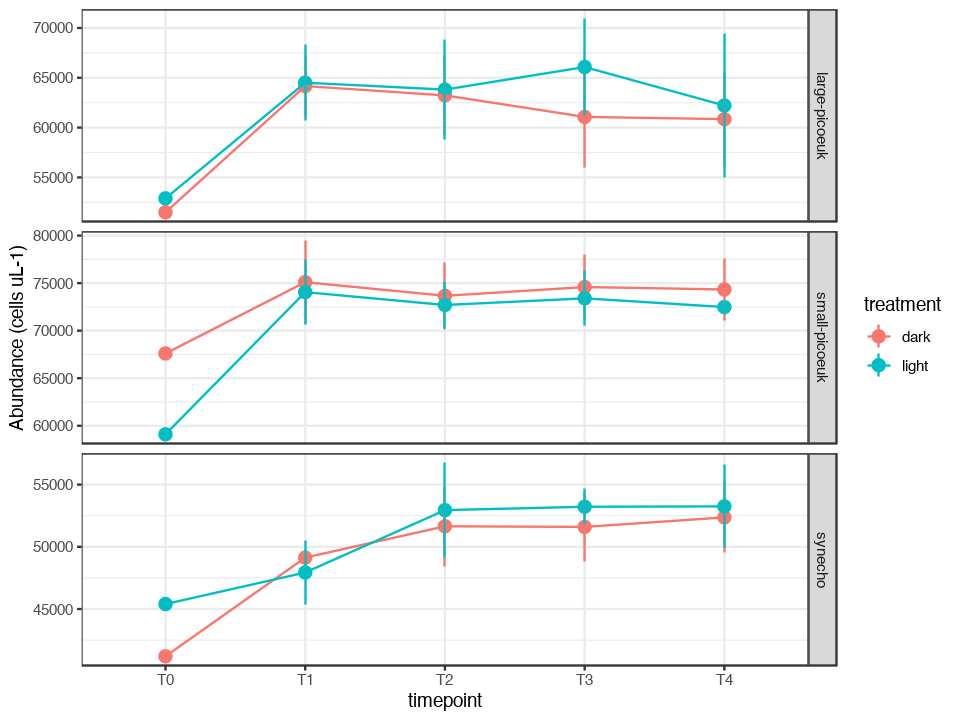

In [5]:
all %>%
    filter(population != "unknown" & population != "beads") %>%
    group_by(timepoint, population, treatment) %>%
    summarize(sd = sd(abundance),
              avg=mean(abundance)) %>%
    ggplot(aes(timepoint, avg, group=treatment, col=treatment)) +
    geom_point(size=3) +
    geom_line() +
    geom_linerange(aes(ymin=avg-sd, ymax=avg+sd)) +
    facet_grid(population ~ ., scale="free_y") + 
    theme_bw() +
    ylab("Abundance (cells uL-1)")

#### b. Scatter

Warning message:
"Removed 6 rows containing missing values (geom_linerange)."

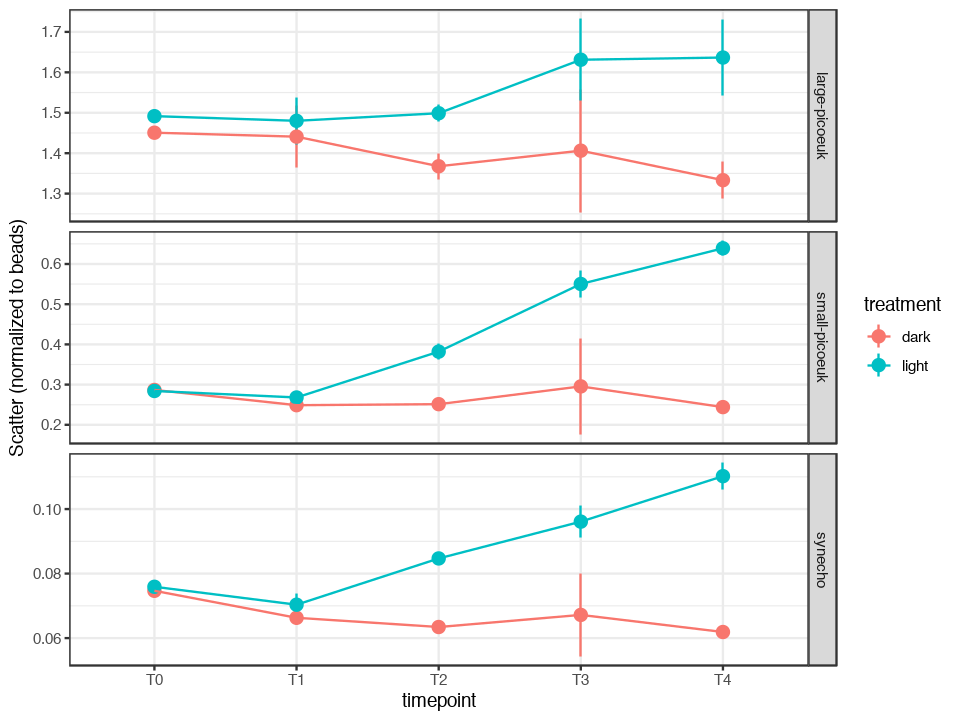

In [6]:
all %>%
    filter(population != "unknown" & population != "beads") %>%
    group_by(timepoint, population, treatment) %>%
    summarize(sd = sd(scatter),
              avg=mean(scatter)) %>%
    ggplot(aes(timepoint, avg, group=treatment, col=treatment)) +
    geom_linerange(aes(ymin=avg-sd, ymax=avg+sd)) +
    geom_point(size=3) +
    geom_line() +
    facet_grid(population ~ ., scale="free_y") + 
    theme_bw() +
    ylab("Scatter (normalized to beads)")

#### c. Red fluorescence

Warning message:
"Removed 6 rows containing missing values (geom_linerange)."

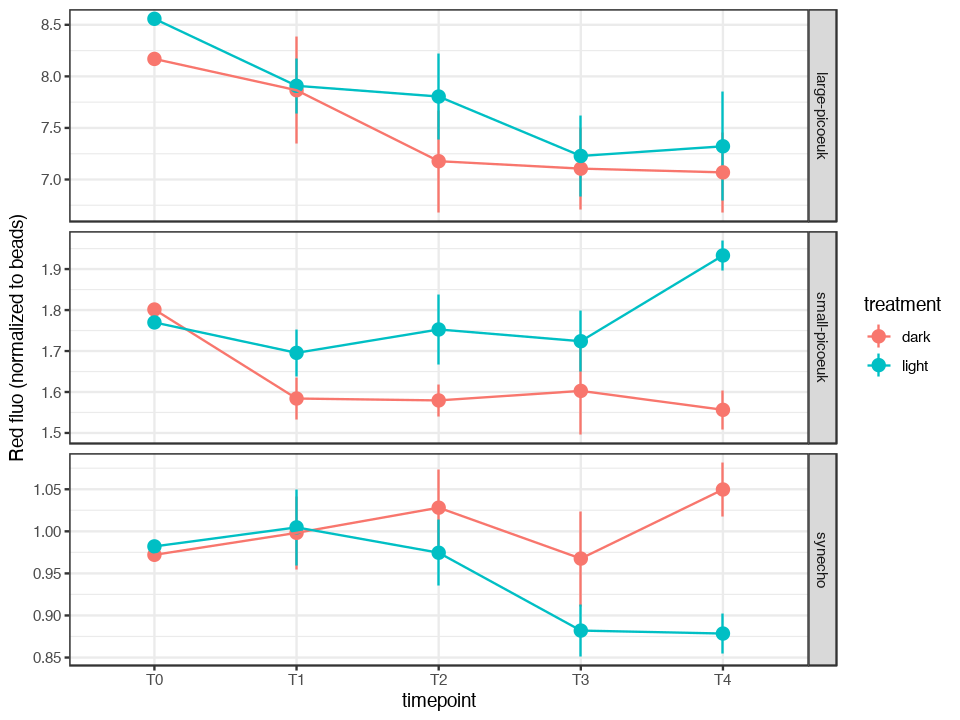

In [7]:
all %>%
    filter(population != "unknown" & population != "beads") %>%
    group_by(timepoint, population, treatment) %>%
    summarize(sd = sd(red),
              avg=mean(red)) %>%
    ggplot(aes(timepoint, avg, group=treatment, col=treatment)) +
    geom_linerange(aes(ymin=avg-sd, ymax=avg+sd)) +
    geom_point(size=3) +
    geom_line() +
    facet_grid(population ~ ., scale="free_y") + 
    theme_bw() +
    ylab("Red fluo (normalized to beads)")